In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [92]:
data =pd.read_csv('machine-learning-ex2\ex2\ex2data2.txt',header=None)

In [93]:
X=data.iloc[:,0:2]
y=data.iloc[:,-1]
data.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


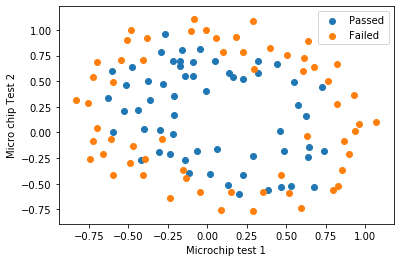

In [94]:
mask=y==1
passed=plt.scatter(X[mask][0].values,X[mask][1].values)
failed =plt.scatter(X[~mask][0].values,X[~mask][1].values)
plt.xlabel('Microchip test 1')
plt.ylabel('Micro chip Test 2')
plt.legend((passed,failed),('Passed','Failed'))
plt.show()

In [95]:
#feature mapping upto 6 degree
def mapfeature(X1,X2):
    degree=6
    out=np.ones(X.shape[0])[:,np.newaxis]
    for i in range(1,degree+1):
        for j in range(i+1):
            out=np.hstack((out,np.multiply(np.power(X1,i-j),np.power(X2,j))[:,np.newaxis]))
    return out
            
            

In [96]:
X=mapfeature(X.iloc[:,0],X.iloc[:,1])
X.shape

(118, 28)

In [97]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [98]:
#theta is leaving the intercept out
#penalize everything except the first term
def costfunction(theta,X_t,y_t,lambda_t):
    m=len(y_t)
    J= (-1/m)* ((y_t.T @ np.log(sigmoid(X_t @ theta)))+ (1-y_t.T) @ (np.log(1-sigmoid(X_t@theta))))
    reg= (lambda_t/(2*m))*(theta[1:].T @ theta[1:])
    J=J+reg
    return J

In [99]:
def lrgradient(theta,X,y,lambda_t):
    m=len(y)
    grad=np.zeros([m,1])
    grad =  (1/m) * (X.T @ (sigmoid(X@theta)-y))
    grad[1:]=grad[1:]+ (lambda_t/m)*(theta[1:])
    return grad

In [100]:
m,n=X.shape
y=y[:,np.newaxis]
theta =np.zeros((n,1))
lmbda=1
J=costfunction(theta,X,y,lmbda)
print(np.ravel(J))

[0.69314718]


In [101]:
'''fmin_tnc is an optimization solver that finds the minimum of an unconstrained function. For logistic regression, 
you want to optimize the cost function with the parameters theta.'''

output =opt.fmin_tnc(func=costfunction,x0=theta.flatten(),fprime =lrgradient,args =(X,y.flatten(),lmbda))
theta =output[0]
print(theta)

[ 1.27271028  0.62529965  1.18111687 -2.019874   -0.91743189 -1.43166932
  0.12393226 -0.36553118 -0.35725404 -0.17516292 -1.45817009 -0.05098418
 -0.61558553 -0.27469166 -1.19271297 -0.2421784  -0.20603298 -0.04466178
 -0.27778951 -0.29539513 -0.45645981 -1.04319155  0.02779373 -0.2924487
  0.0155576  -0.32742406 -0.1438915  -0.92467486]


In [102]:
J=costfunction(theta,X,y,lmbda)
print(J)

[0.52900273]


In [103]:

#accuracy
pred = [sigmoid(np.dot(X, theta)) >= 0.5]
np.mean(pred == y.flatten()) * 100

83.05084745762711

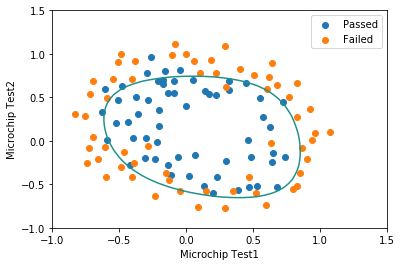

In [105]:
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))
def mapFeatureForPlotting(X1, X2):
    degree = 6
    out = np.ones(1)
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j), np.power(X2, j))))
    return out
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(mapFeatureForPlotting(u[i], v[j]), theta)
mask = y.flatten() == 1
X = data.iloc[:,:-1]
passed = plt.scatter(X[mask][0], X[mask][1])
failed = plt.scatter(X[~mask][0], X[~mask][1])
plt.contour(u,v,z,0)
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()

NameError: name 'digit_class' is not defined

In [ ]:
!pip install pyzipcode